<a href="https://colab.research.google.com/github/deft667788/Faker/blob/main/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random

import seaborn as sns
from numpy import float32

In [ ]:
data = pd.read_csv('abalone.data', sep=',', header = None)
print(data)
data_in = data.values
data_in[:,0] = np.where(data_in[:,0] == 'M', 0, np.where(data_in[:,0] == 'F', 1, -1))

data_in = data_in.astype(float32)
corr_mat = np.corrcoef(data_in.T)
print(corr_mat, ' is the correlation matrix of the data')


data=data.replace(['M','F','I'],[0,1,-1])
# print(data)

data=np.array(data)

candidates = {'Sex': data[:,0],
             'Length': data[:,1],
             'Diameter': data[:,2],
             'Height': data[:,3],
             'Whole_weight': data[:,4],
             'Shucked_weight': data[:,5],
             'Viscera_weight':data[:,6],
             'Shell_weight':data[:,7],
             'Rings':data[:,8]}

df = pd.DataFrame(candidates, columns= ['Sex','Length','Diameter','Height','Whole_weight',
                                        'Shucked_weight','Viscera_weight','Shell_weight','Rings'])
for i in range(len(df['Rings'])):
    if df['Rings'][i]<=7:
        df['Rings'][i]=1
    if df['Rings'][i]<=10 and df['Rings'][i]>=8:
        df['Rings'][i]=2
    if df['Rings'][i]<=15 and df['Rings'][i]>=11:
        df['Rings'][i]=3
    if df['Rings'][i]>15:
        df['Rings'][i]=4

      0      1      2      3       4       5       6       7   8
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]
[[1.         0.50369733 0.51645031 0.47784966 0.50151146 0.45973114
  0.50569267 0.49910338 0.40144475]
 [0.50369733 1.         0.98681158 0.82755361 0.92526117 0.89791366
  0.9030177  0.89770557

# 新段落

                 Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
Sex             1.00    0.50      0.52    0.48          0.50            0.46   
Length          0.50    1.00      0.99    0.83          0.93            0.90   
Diameter        0.52    0.99      1.00    0.83          0.93            0.89   
Height          0.48    0.83      0.83    1.00          0.82            0.77   
Whole_weight    0.50    0.93      0.93    0.82          1.00            0.97   
Shucked_weight  0.46    0.90      0.89    0.77          0.97            1.00   
Viscera_weight  0.51    0.90      0.90    0.80          0.97            0.93   
Shell_weight    0.50    0.90      0.91    0.82          0.96            0.88   
Rings           0.42    0.59      0.61    0.58          0.57            0.47   

                Viscera_weight  Shell_weight  Rings  
Sex                       0.51          0.50   0.42  
Length                    0.90          0.90   0.59  
Diameter                  0.90       

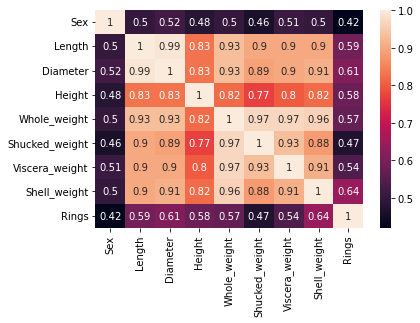

In [ ]:
def draw_heatmap(data):
    correlation_matrix = df.corr().round(2)
    print(correlation_matrix)
    sns.heatmap(data=correlation_matrix, annot=True)
    plt.rc('figure',figsize=(10,10))
    plt.savefig('heatmap.png')
    plt.show()
    
draw_heatmap(df)

In [ ]:
df.Rings = df['Rings'].apply(int)
df.Rings = df['Rings'].apply(str)

In [ ]:
X = df[['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']]
Y = df['Rings']

def create_set(n):
    from sklearn.model_selection import train_test_split

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=n)
    print(X_train.shape)
    print(X_test.shape)
    print(Y_train.shape)
    print(Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test=create_set(10)

(2506, 8)
(1671, 8)
(2506,)
(1671,)


In [ ]:
print(X.index)
print(X_train.shape)
print(Y_test)

RangeIndex(start=0, stop=4177, step=1)
(2506, 8)
1080    1
1371    2
2591    2
235     2
2143    2
       ..
426     4
1457    1
1139    2
3157    2
709     1
Name: Rings, Length: 1671, dtype: object


In [ ]:
from sklearn.tree import DecisionTreeClassifier

x = X_train
y = Y_train

tree_clf = DecisionTreeClassifier(random_state=0, max_depth=2, criterion = 'gini')
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
feature_name = ['Sex','Length','Diameter','Height','Whole_weight',
                'Shucked_weight','Viscera_weight','Shell_weight']

target_name = ['Rings']

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0, max_depth=2, criterion = 'gini')
tree_clf.fit(x, y)

from sklearn.tree import export_graphviz

export_graphviz(
                tree_clf,
                out_file='tree2.dot', 
                feature_names = df.columns[:8],
                class_names = df.Rings,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:

# # Convert to png
from subprocess import check_call


In [ ]:
check_call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png'])

0

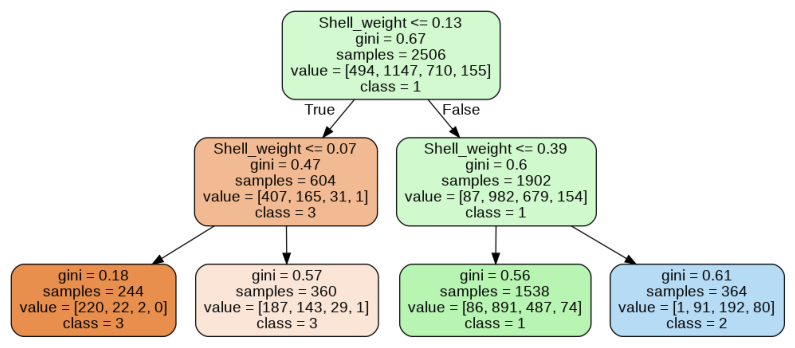

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree2.png'))
plt.axis('off');
plt.savefig('CART_dtree2.png')
plt.show()

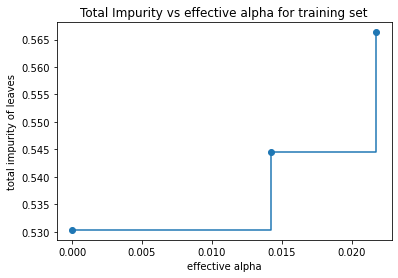

In [ ]:
path = tree_clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.rc('figure',figsize=(5,5))
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.savefig('impurity_vsalpha.png')
plt.show()

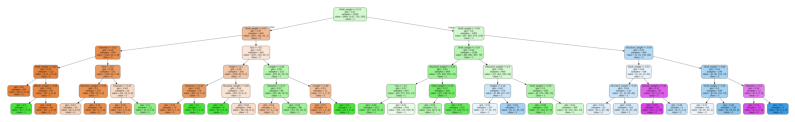

In [ ]:
from sklearn.tree import DecisionTreeClassifier

x = X_train
y = Y_train

tree_clf = DecisionTreeClassifier(random_state=0, max_depth=5, criterion = 'gini')
tree_clf.fit(x, y)

from sklearn.tree import export_graphviz

export_graphviz(
                tree_clf,
                out_file='tree1.dot', 
                feature_names = df.columns[:8],
                class_names = df.Rings,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
check_call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'])
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree1.png'))
plt.axis('off');
plt.savefig('CART_dtree1.png')
plt.show()

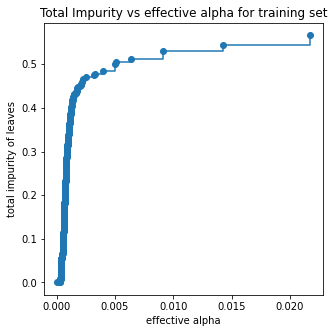

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1012225559903871


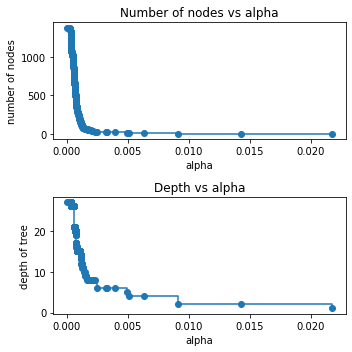

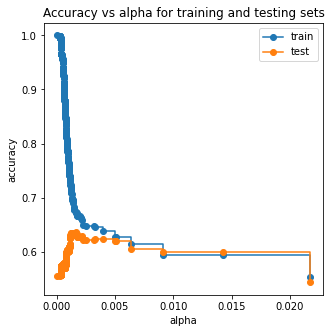

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.rc('figure',figsize=(5,5))
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.savefig('impurity_vsalpha1.png')
plt.show()

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


#We remove the last element in clfs and ccp_alphas, because it is the 
#trivial tree with only one node. Here we show that the number of nodes 
#and tree depth decreases as alpha increases.

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
plt.savefig('nodes_vsalpha.png')

#As alpha increases, more of the tree is pruned, thus creating 
#a decision tree that generalizes better. In this example, 
#setting ccp_alpha=0.015 maximizes the testing accuracy.

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.savefig('xxx.png')

plt.show()

In [ ]:
print(X.shape)
print(Y.shape)

(4177, 8)
(4177,)


In [ ]:
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 5, n_estimators=10)

# Train
model.fit(x, y)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree3.dot', 
                feature_names = df.columns[:8],
                class_names = df.Rings,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

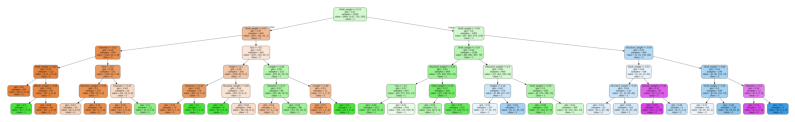

In [ ]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree1.png'))
plt.axis('off');
plt.show();

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, Y_train)

y_pred= rnd_clf.predict(X_test)
y_pred_train= rnd_clf.predict(X_train) 

print(accuracy_score(Y_train, y_pred_train))
print(accuracy_score(Y_test, y_pred))

0.6476456504389465
0.6283662477558348


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x, y, cv=5)
print(scores.mean(), ' RF')

0.6181135736495138  RF


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=16, n_jobs=-1,criterion = 'gini')
rnd_clf.fit(X_train, Y_train)

y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(Y_test, y_pred_rf)

0.6199880311190904

>50 0.614 (0.021) conf_intveral: (0.572419535557759, 0.6548775167525458)
>100 0.619 (0.023) conf_intveral: (0.5731608231289145, 0.6640018677709973)
>150 0.621 (0.022) conf_intveral: (0.5779486096539581, 0.664762484628511)
>200 0.621 (0.023) conf_intveral: (0.5754740140276576, 0.6673398879607993)
>250 0.621 (0.022) conf_intveral: (0.5776053566180227, 0.66511354003499)
>300 0.620 (0.022) conf_intveral: (0.5772088751352336, 0.6621575264803161)
>350 0.622 (0.021) conf_intveral: (0.5798216933189307, 0.6634676943097223)
>400 0.621 (0.022) conf_intveral: (0.5783342361216088, 0.6629458116105402)
>450 0.619 (0.021) conf_intveral: (0.577200544269087, 0.6613009416235386)
>500 0.622 (0.021) conf_intveral: (0.5804870333480893, 0.6637602100055532)


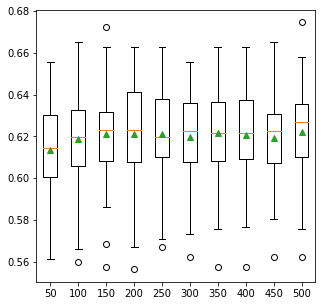

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
from scipy import stats
 
# get the dataset
def get_dataset():
	x,y =X, Y
	return x, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [50,100,150,200,250,300,350,400,450,500]
	for n in n_trees:
		models[str(n)] = BaggingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, x, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=4)
	# evaluate the model and collect the results
	scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
x, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, x, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f) conf_intveral:' % (name, mean(scores), std(scores)), stats.norm.interval(0.95, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.savefig('bagging.png')

In [ ]:
from numpy import *
import seaborn as sn

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot

import random

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc

In [ ]:
classes=['1', '2', '3', '4']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('cmat.png')
    plt.show()

In [ ]:
def scipy_nn(x_train, x_test, y_train, y_test, type_model, hidden, learn_rate, run_num):
    #Source: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

    #random_stateint, RandomState instance, default=None Determines random number generation
    # for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver=’sgd’
    #or ‘adam’. Pass an int for reproducible results across multiple function calls.

    #learning_rate_initdouble, default=0.001
    #The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

    #note Adam does not need momentum and constant learning rate since they are adjusted in Adam itself

    if type_model ==0: #SGD
        nn = MLPClassifier(hidden_layer_sizes=(hidden,hidden,hidden), random_state=run_num, max_iter=10000,solver='sgd',  learning_rate_init=learn_rate )
        #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    elif type_model ==1: #Adam
        nn = MLPClassifier(hidden_layer_sizes=(hidden,hidden,hidden), random_state=run_num, max_iter=10000,solver='adam', learning_rate_init=learn_rate)
        #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    elif type_model ==2: #SGD with 2 hidden layers
        nn = MLPClassifier(hidden_layer_sizes=(hidden,hidden,hidden), random_state=run_num, max_iter=10000,solver='sgd',learning_rate='constant', learning_rate_init=learn_rate)
        #hidden_layer_sizes=(hidden,hidden, hidden) would implement 3 hidden layers
    else:
        print('no model')    
 
    # Train the model using the training sets
    nn.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred_test = nn.predict(x_test)
    y_pred_train = nn.predict(x_train)

    #print([coef.shape for coef in nn.coefs_], 'weights shape')
 
    #print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))  
    acc_test = accuracy_score(y_pred_test, y_test) 
    acc_train = accuracy_score(y_pred_train, y_train) 
    
#      cm = multilabel_confusion_matrix(y_pred_test, y_test) 
    cm = confusion_matrix(y_pred_test, y_test, labels=['1', '2', '3', '4']) 
#     print(cm, 'is confusion matrix')
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=['1', '2', '3', '4'],
                          title='Confusion matrix')
#     plt.show()

#     auc = roc_auc_score(y_pred_test, y_test, average=None, multi_class='ovo') 
# #     print(auc)
    
    
#     ns_probs = [0 for _ in range(len(y_test))]
#     # fit a model
#     model = LogisticRegression(solver='lbfgs')
#     model.fit(x_train, y_train)
# #     predict probabilities
#     lr_probs = model.predict_proba(x_test)
#     # keep probabilities for the positive outcome only
#     lr_probs = lr_probs[:, 1]
#     # calculate scores
#     ns_auc = roc_auc_score( y_pred_test, ns_probs,multi_class = 'ovr')
#     lr_auc = roc_auc_score( y_pred_test, lr_probs)
#     # summarize scores
#     print('No Skill: ROC AUC=%.3f' % (ns_auc))
#     print('Logistic: ROC AUC=%.3f' % (lr_auc))
#     # calculate roc curves
#     ns_fpr, ns_tpr, _ = roc_curve( y_pred_test, ns_probs)
#     lr_fpr, lr_tpr, _ = roc_curve( y_pred_test, lr_probs)
#     # plot the roc curve for the model
#     print(learn_rate)
#     pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#     pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
#     # axis labels
#     pyplot.xlabel('learn_rate'+str(learn_rate)+'False Positive Rate')
#     pyplot.ylabel('True Positive Rate')
#     # show the legend
#     pyplot.legend()
# #     show the plot
#     pyplot.savefig(str(learn_rate)+'plot.png')
#     plt.show()
    return acc_test #,acc_train

Confusion matrix, without normalization
[[252  58   7   0]
 [ 91 541 173  13]
 [  1 143 268  66]
 [  1   2  28  27]]


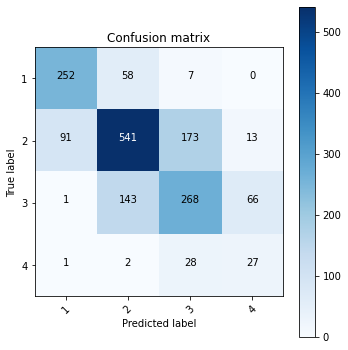

Confusion matrix, without normalization
[[255  69   8   0]
 [ 88 569 204  20]
 [  2 105 245  67]
 [  0   1  19  19]]


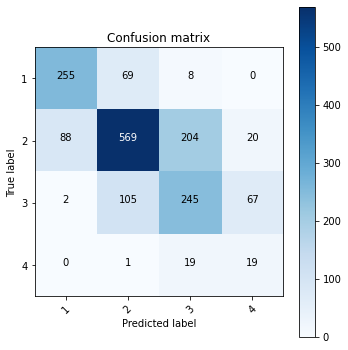

Confusion matrix, without normalization
[[252  58   7   0]
 [ 91 541 173  13]
 [  1 143 268  66]
 [  1   2  28  27]]


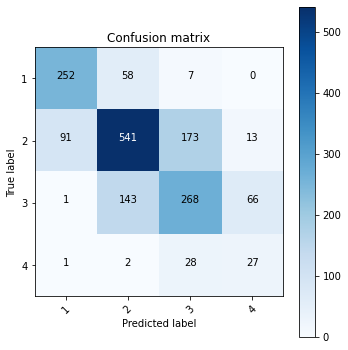

Confusion matrix, without normalization
[[263  76   9   0]
 [ 80 570 248  22]
 [  1  97 199  66]
 [  1   1  20  18]]


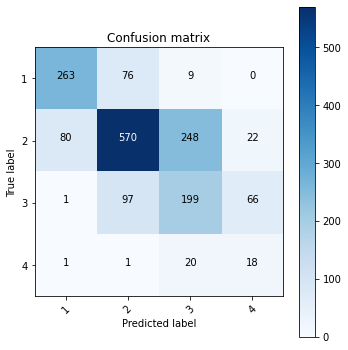

Confusion matrix, without normalization
[[232  48   5   0]
 [110 561 183  17]
 [  2 134 264  62]
 [  1   1  24  27]]


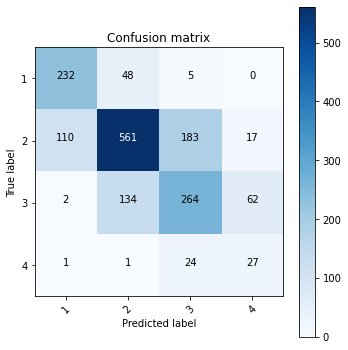

Confusion matrix, without normalization
[[263  76   9   0]
 [ 80 570 248  22]
 [  1  97 199  66]
 [  1   1  20  18]]


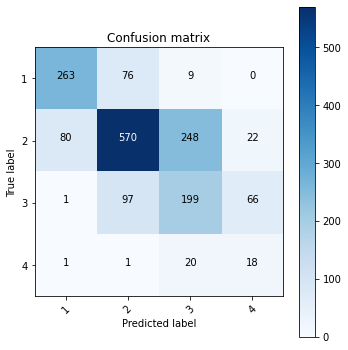

Confusion matrix, without normalization
[[255  63   7   0]
 [ 88 582 227  20]
 [  1  98 226  66]
 [  1   1  16  20]]


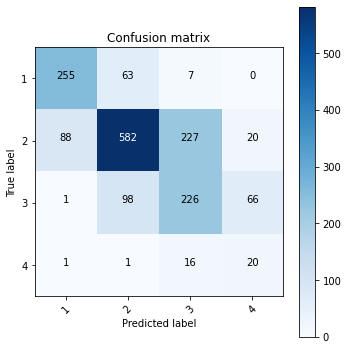

Confusion matrix, without normalization
[[255  58   8   0]
 [ 87 499 134   9]
 [  2 185 312  72]
 [  1   2  22  25]]


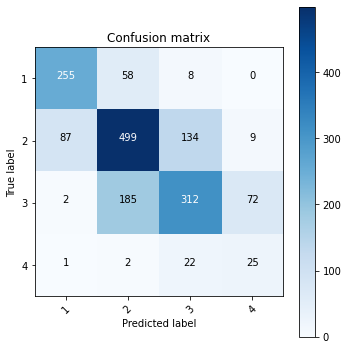

Confusion matrix, without normalization
[[255  63   7   0]
 [ 88 582 227  20]
 [  1  98 226  66]
 [  1   1  16  20]]


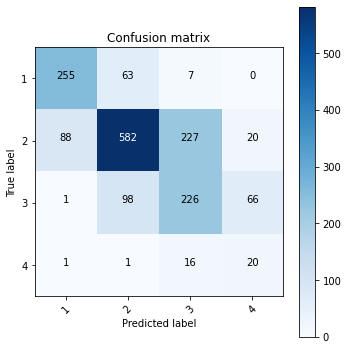

Confusion matrix, without normalization
[[248  57   7   0]
 [ 94 516 151   9]
 [  2 169 292  64]
 [  1   2  26  33]]


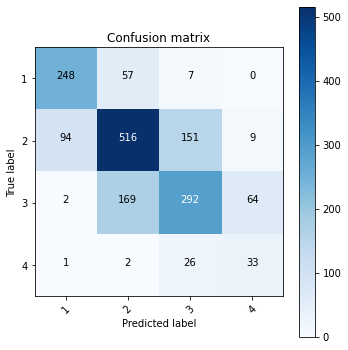

Confusion matrix, without normalization
[[250  61   8   0]
 [ 94 568 208  17]
 [  0 114 238  63]
 [  1   1  22  26]]


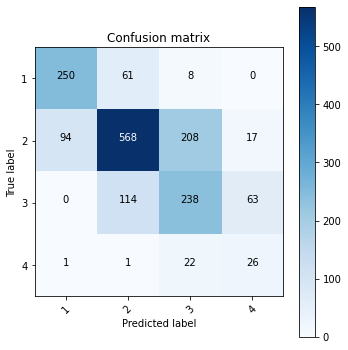

Confusion matrix, without normalization
[[248  57   7   0]
 [ 94 516 151   9]
 [  2 169 292  64]
 [  1   2  26  33]]


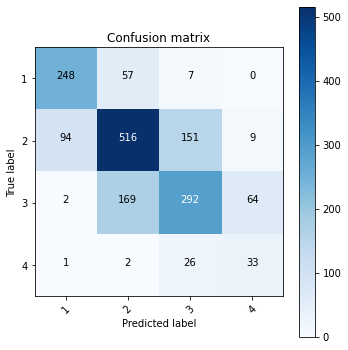

Confusion matrix, without normalization
[[244  62   7   0]
 [ 99 565 190  16]
 [  1 116 258  67]
 [  1   1  21  23]]


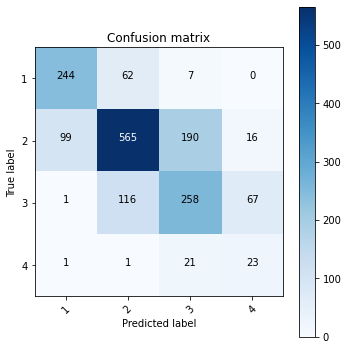

Confusion matrix, without normalization
[[275  88  11   0]
 [ 69 571 248  21]
 [  0  84 200  70]
 [  1   1  17  15]]


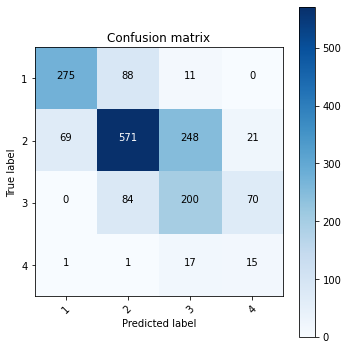

Confusion matrix, without normalization
[[244  62   7   0]
 [ 99 565 190  16]
 [  1 116 258  67]
 [  1   1  21  23]]


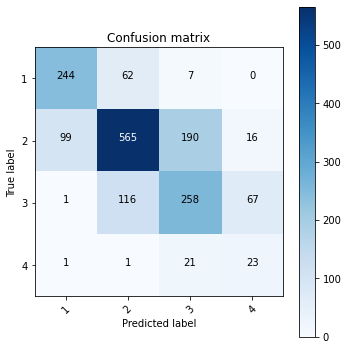

[0.65110712 0.62836625 0.6481149  0.65170557 0.65230401] 15  SGD_all
0.6463195691202872 15  mean SGD_all
0.009091623705485545 15  std SGD_all
[0.65110712 0.64871335 0.65290245 0.64751646 0.63494913] 15  Adam_all
0.6470377019748653 15 mean Adam _all
0.006326547114974282 15 std Adam _all
Confusion matrix, without normalization
[[238  60   6   0]
 [104 585 220  19]
 [  3  98 235  73]
 [  0   1  15  14]]


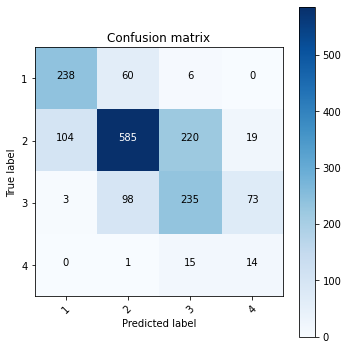

Confusion matrix, without normalization
[[247  52   6   0]
 [ 97 598 227  22]
 [  0  92 219  61]
 [  1   2  24  23]]


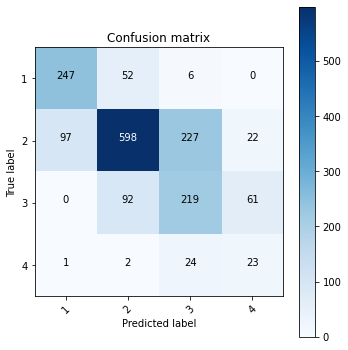

Confusion matrix, without normalization
[[238  60   6   0]
 [104 585 220  19]
 [  3  98 235  73]
 [  0   1  15  14]]


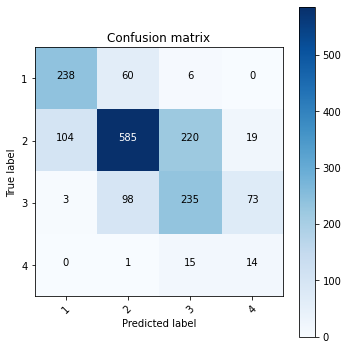

Confusion matrix, without normalization
[[241  58   7   0]
 [102 535 159  14]
 [  1 150 292  76]
 [  1   1  18  16]]


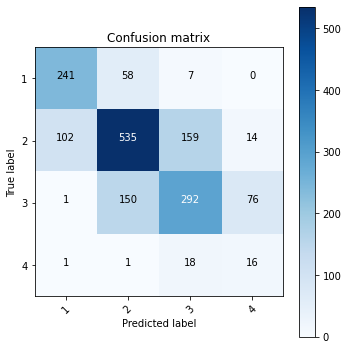

Confusion matrix, without normalization
[[282 115  14   0]
 [ 62 575 278  28]
 [  1  53 172  66]
 [  0   1  12  12]]


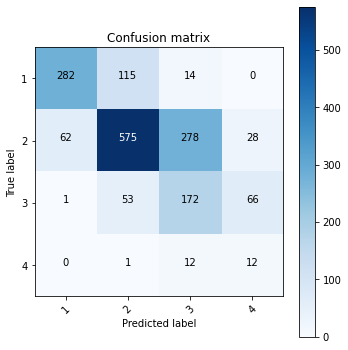

Confusion matrix, without normalization
[[241  58   7   0]
 [102 535 159  14]
 [  1 150 292  76]
 [  1   1  18  16]]


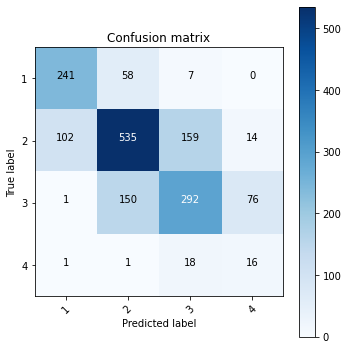

Confusion matrix, without normalization
[[229  51   6   0]
 [115 632 278  25]
 [  1  60 183  71]
 [  0   1   9  10]]


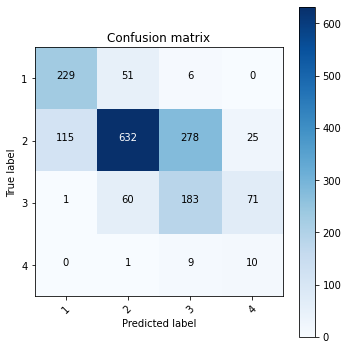

Confusion matrix, without normalization
[[258  64   8   0]
 [ 85 577 240  21]
 [  2 102 218  73]
 [  0   1  10  12]]


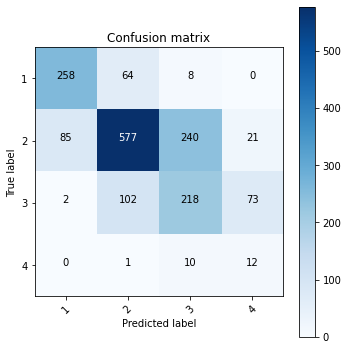

Confusion matrix, without normalization
[[229  51   6   0]
 [115 632 278  25]
 [  1  60 183  71]
 [  0   1   9  10]]


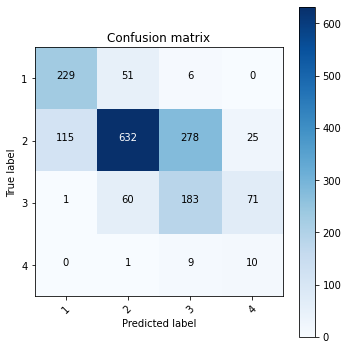

Confusion matrix, without normalization
[[267  81  10   0]
 [ 77 587 242  24]
 [  0  75 204  60]
 [  1   1  20  22]]


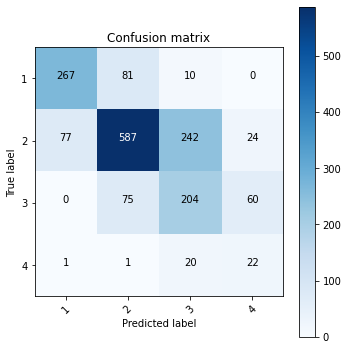

Confusion matrix, without normalization
[[250  63   7   0]
 [ 94 621 269  30]
 [  1  60 194  68]
 [  0   0   6   8]]


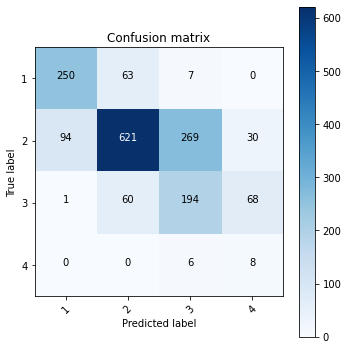

Confusion matrix, without normalization
[[267  81  10   0]
 [ 77 587 242  24]
 [  0  75 204  60]
 [  1   1  20  22]]


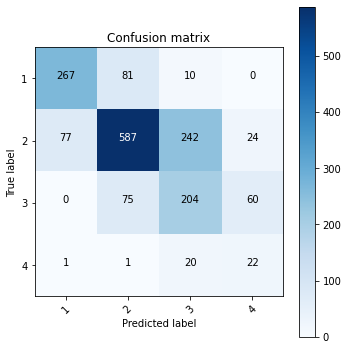

Confusion matrix, without normalization
[[259  68   8   0]
 [ 83 514 162  10]
 [  3 160 284  70]
 [  0   2  22  26]]


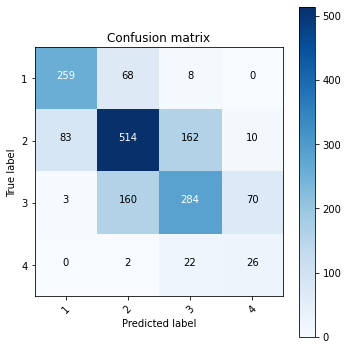

Confusion matrix, without normalization
[[270  82  11   0]
 [ 74 590 253  25]
 [  1  71 198  66]
 [  0   1  14  15]]


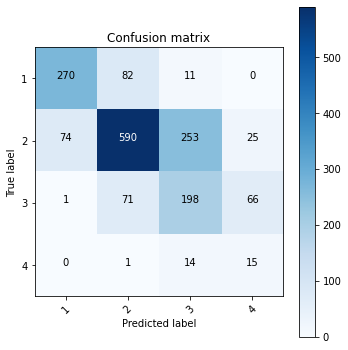

Confusion matrix, without normalization
[[259  68   8   0]
 [ 83 514 162  10]
 [  3 160 284  70]
 [  0   2  22  26]]


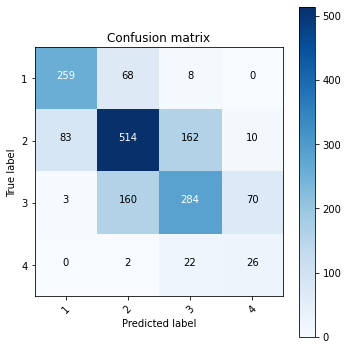

[0.64153202 0.64871335 0.63076002 0.64631957 0.6481149 ] 15  SGD_all
0.6430879712746859 15  mean SGD_all
0.0066596901224385534 15  std SGD_all
[0.65050868 0.62298025 0.63734291 0.64213046 0.64213046] 15  Adam_all
0.63901855176541 15 mean Adam _all
0.009071116850506947 15 std Adam _all
Confusion matrix, without normalization
[[261  76  10   0]
 [ 83 575 262  52]
 [  1  93 204  54]
 [  0   0   0   0]]


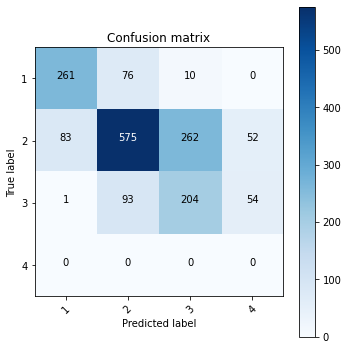

Confusion matrix, without normalization
[[172  19   1   0]
 [169 503 131   6]
 [  4 221 322  81]
 [  0   1  22  19]]


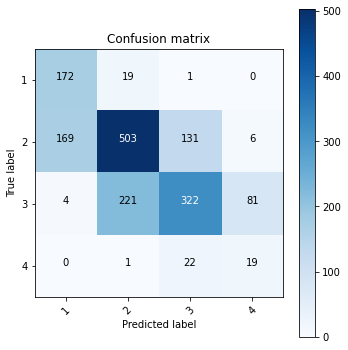

Confusion matrix, without normalization
[[261  76  10   0]
 [ 83 575 262  52]
 [  1  93 204  54]
 [  0   0   0   0]]


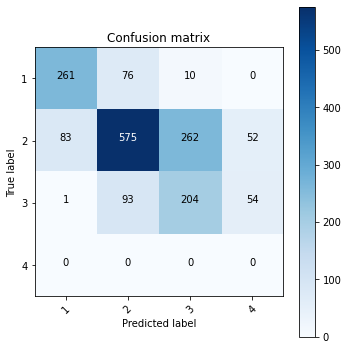

Confusion matrix, without normalization
[[273  93  11   0]
 [ 71 591 276  26]
 [  1  59 180  67]
 [  0   1   9  13]]


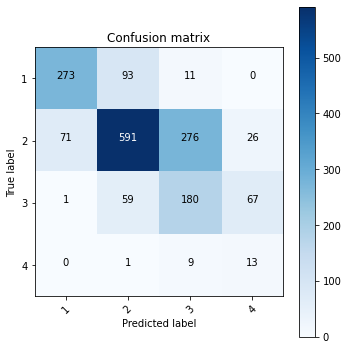

Confusion matrix, without normalization
[[277  97  12   0]
 [ 66 528 194  20]
 [  2 118 254  73]
 [  0   1  16  13]]


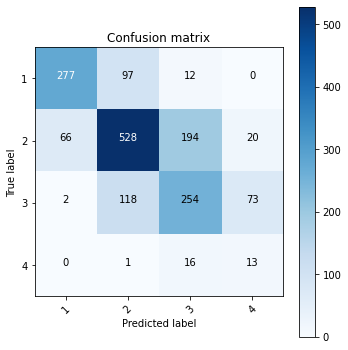

Confusion matrix, without normalization
[[273  93  11   0]
 [ 71 591 276  26]
 [  1  59 180  67]
 [  0   1   9  13]]


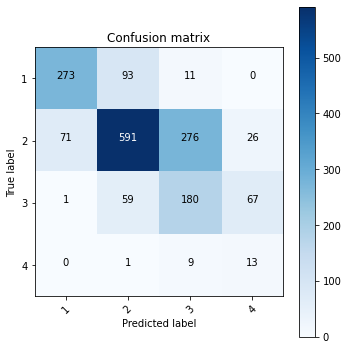

Confusion matrix, without normalization
[[251  55   7   0]
 [ 88 398 116  15]
 [  6 291 353  91]
 [  0   0   0   0]]


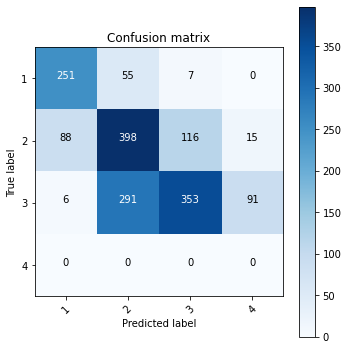

Confusion matrix, without normalization
[[225  51   6   0]
 [117 483 153  15]
 [  3 210 312  87]
 [  0   0   5   4]]


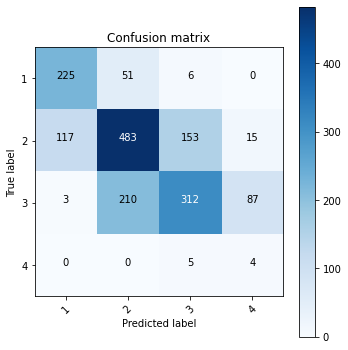

Confusion matrix, without normalization
[[251  55   7   0]
 [ 88 398 116  15]
 [  6 291 353  91]
 [  0   0   0   0]]


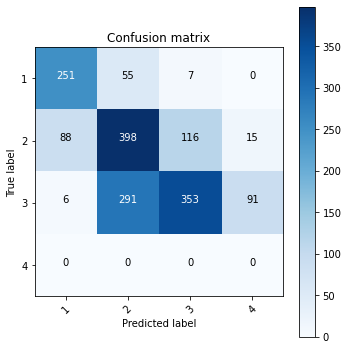

Confusion matrix, without normalization
[[192  33   2   0]
 [152 644 262  24]
 [  1  67 210  79]
 [  0   0   2   3]]


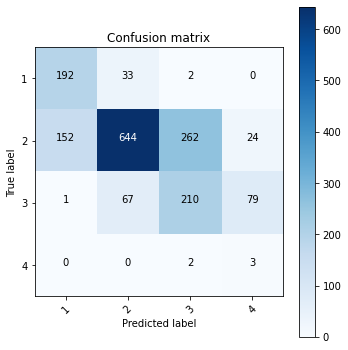

Confusion matrix, without normalization
[[257  73   9   0]
 [ 88 671 467 106]
 [  0   0   0   0]
 [  0   0   0   0]]


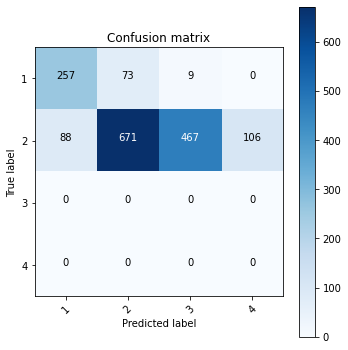

Confusion matrix, without normalization
[[192  33   2   0]
 [152 644 262  24]
 [  1  67 210  79]
 [  0   0   2   3]]


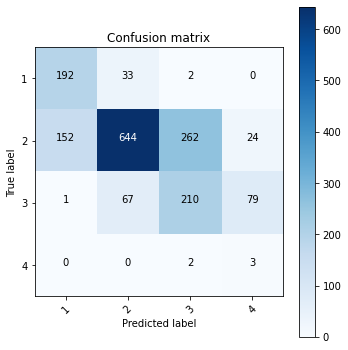

Confusion matrix, without normalization
[[210  43   5   0]
 [135 662 327  52]
 [  0  39 131  47]
 [  0   0  13   7]]


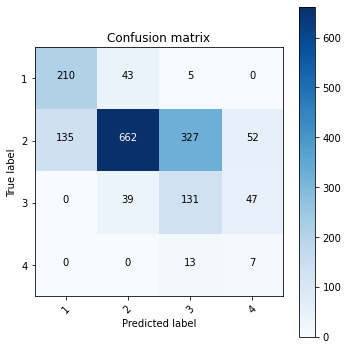

Confusion matrix, without normalization
[[272  80  12   0]
 [ 72 573 268  23]
 [  0  89 174  63]
 [  1   2  22  20]]


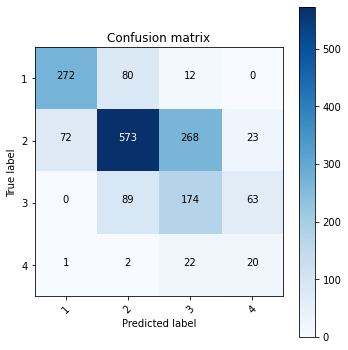

Confusion matrix, without normalization
[[210  43   5   0]
 [135 662 327  52]
 [  0  39 131  47]
 [  0   0  13   7]]


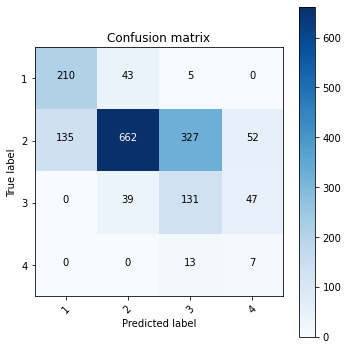

[0.62238181 0.63255536 0.59964093 0.6277678  0.60442849] 15  SGD_all
0.6173548773189708 15  mean SGD_all
0.013004837658978512 15  std SGD_all
[0.60801915 0.64153202 0.6128067  0.55535607 0.62178336] 15  Adam_all
0.607899461400359 15 mean Adam _all
0.028666406784209487 15 std Adam _all
Confusion matrix, without normalization
[[288 117  21   1]
 [ 57 627 455 105]
 [  0   0   0   0]
 [  0   0   0   0]]


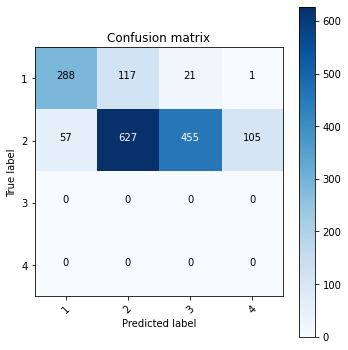

Confusion matrix, without normalization
[[  0   0   0   0]
 [345 744 476 106]
 [  0   0   0   0]
 [  0   0   0   0]]


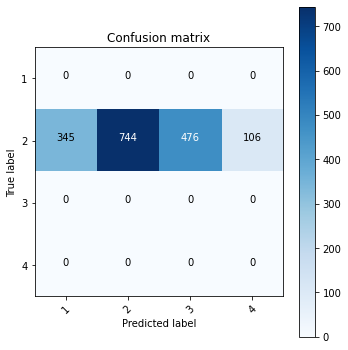

Confusion matrix, without normalization
[[288 117  21   1]
 [ 57 627 455 105]
 [  0   0   0   0]
 [  0   0   0   0]]


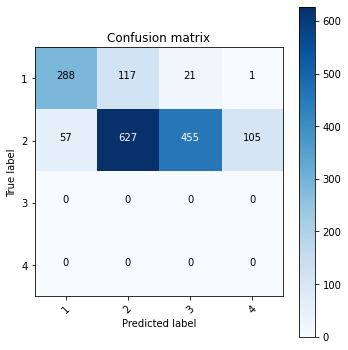

Confusion matrix, without normalization
[[103   7   0   0]
 [242 737 472 101]
 [  0   0   4   4]
 [  0   0   0   1]]


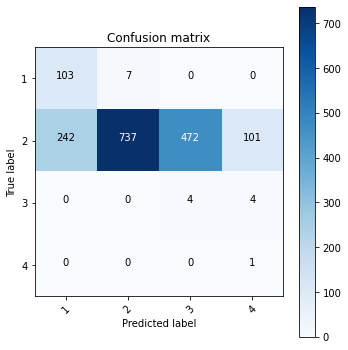

Confusion matrix, without normalization
[[  0   0   0   0]
 [345 744 476 106]
 [  0   0   0   0]
 [  0   0   0   0]]


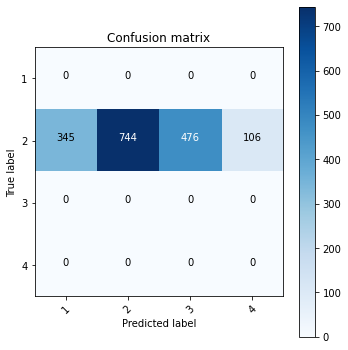

Confusion matrix, without normalization
[[103   7   0   0]
 [242 737 472 101]
 [  0   0   4   4]
 [  0   0   0   1]]


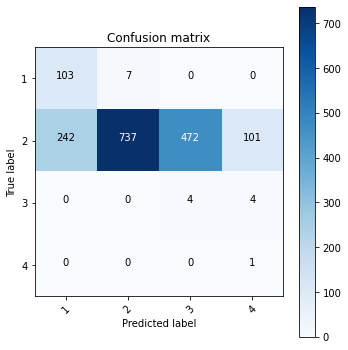

Confusion matrix, without normalization
[[262  76  11   0]
 [ 81 518 164  15]
 [  2 150 301  91]
 [  0   0   0   0]]


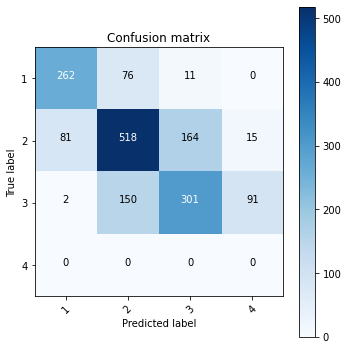

Confusion matrix, without normalization
[[  0   0   0   0]
 [345 744 476 106]
 [  0   0   0   0]
 [  0   0   0   0]]


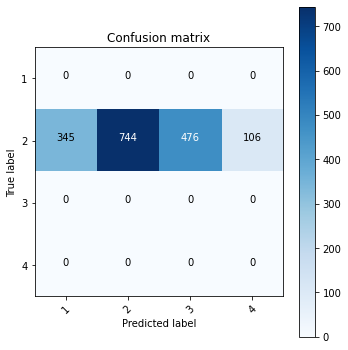

Confusion matrix, without normalization
[[262  76  11   0]
 [ 81 518 164  15]
 [  2 150 301  91]
 [  0   0   0   0]]


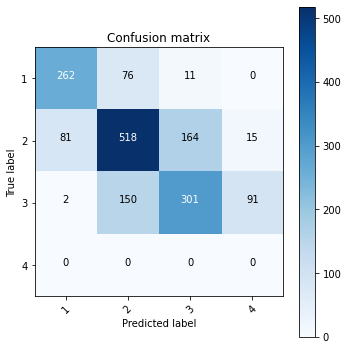

Confusion matrix, without normalization
[[223  51   4   0]
 [122 660 359  79]
 [  0  33 113  27]
 [  0   0   0   0]]


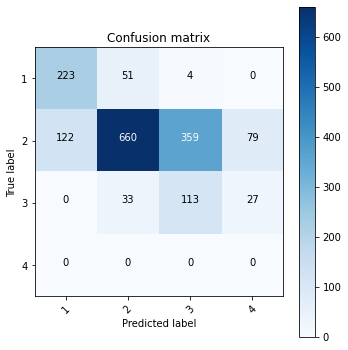

Confusion matrix, without normalization
[[  0   0   0   0]
 [345 744 476 106]
 [  0   0   0   0]
 [  0   0   0   0]]


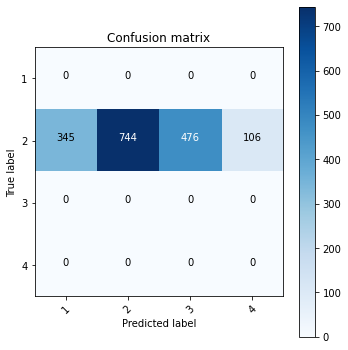

Confusion matrix, without normalization
[[223  51   4   0]
 [122 660 359  79]
 [  0  33 113  27]
 [  0   0   0   0]]


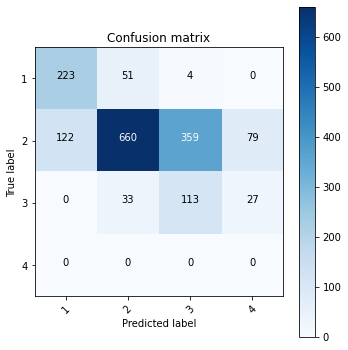

Confusion matrix, without normalization
[[  0   0   0   0]
 [345 744 476 106]
 [  0   0   0   0]
 [  0   0   0   0]]


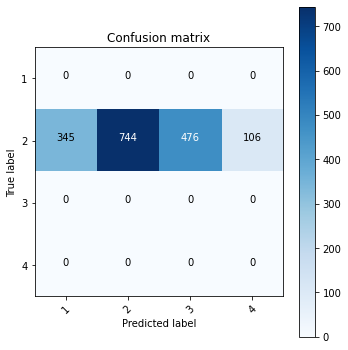

Confusion matrix, without normalization
[[  0   0   0   0]
 [345 744 476 106]
 [  0   0   0   0]
 [  0   0   0   0]]


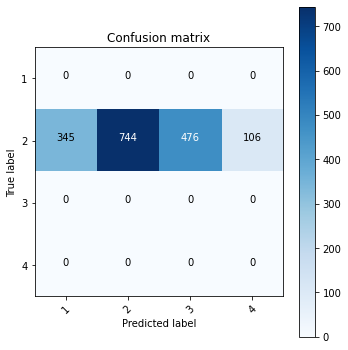

Confusion matrix, without normalization
[[  0   0   0   0]
 [345 744 476 106]
 [  0   0   0   0]
 [  0   0   0   0]]


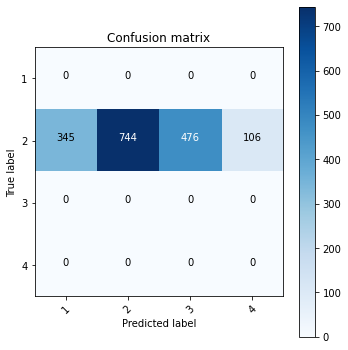

[0.5475763  0.50568522 0.64691801 0.59605027 0.44524237] 15  SGD_all
0.5482944344703771 15  mean SGD_all
0.06991855128082629 15  std SGD_all
[0.44524237 0.44524237 0.44524237 0.44524237 0.44524237] 15  Adam_all
0.4452423698384201 15 mean Adam _all
0.0 15 std Adam _all


In [ ]:
max_expruns = 5

SGD_all = np.zeros(max_expruns) 
Adam_all = np.zeros(max_expruns) 

SGD2_all = np.zeros(max_expruns)  
max_hidden = 100

hidden = 15

#learn_rate = 0.01
#hidden = 8


#for learn_rate in range(0.1,1, 0.2):

for learn_rate in [0.01,0.05,0.2,0.5]:

#for hidden in range(6,max_hidden, 2):

    for run_num in range(0,max_expruns):    

        acc_sgd = scipy_nn(X_train, X_test, Y_train, Y_test, 0, hidden, learn_rate, run_num) #SGD
        acc_adam = scipy_nn(X_train, X_test, Y_train, Y_test, 1, hidden, learn_rate, run_num) #Adam 
        acc_sgd2 = scipy_nn(X_train, X_test, Y_train, Y_test, 2, hidden, learn_rate,  run_num) #SGD2

        SGD_all[run_num] = acc_sgd
        Adam_all[run_num] = acc_adam

#        SGD2_all[run_num] = acc_sgd2 # two hidden layers

    print(SGD_all, hidden,' SGD_all')
    print(np.mean(SGD_all), hidden, ' mean SGD_all')
    print(np.std(SGD_all), hidden, ' std SGD_all')

    print(Adam_all, hidden,' Adam_all')
    print(np.mean(Adam_all), hidden, 'mean Adam _all')
    print(np.std(Adam_all), hidden, 'std Adam _all')

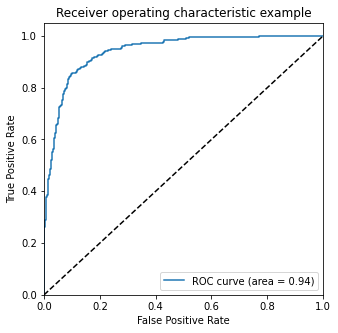

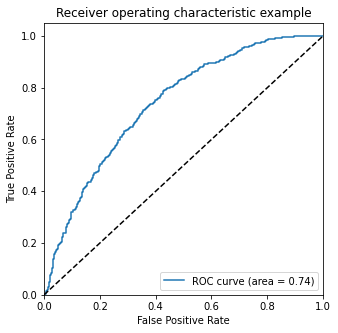

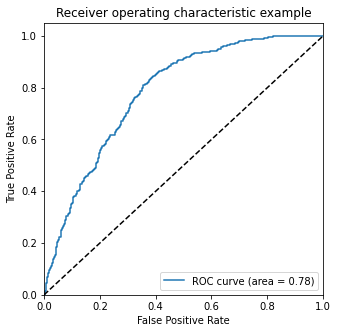

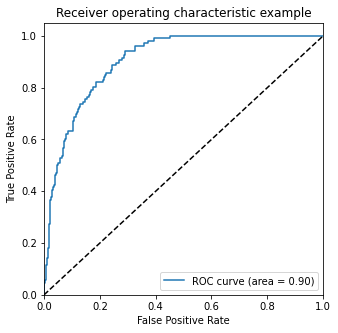

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_train = label_binarize(Y_train, classes=['1','2','3','4'])
y_test = label_binarize(Y_test, classes=['1','2','3','4'])
n_classes = 4

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    j=str(i+1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(j+'ROC.png')
    plt.show()